![Fixel Algorithms](https://fixelalgorithms.co/images/CCExt.png)

# <center> Machine Learning Methods </center>
## <center> Lecture 10 - Regression</center>
### <center> Regression and LASSO Regularization</center>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/FixelAlgorithmsTeam/FixelCourses/blob/master/MachineLearningMethod/10_Regression/MainLassoRegression.ipynb)

In [1]:
import numpy             as np
import matplotlib.pyplot as plt
import matplotlib
import warnings

matplotlib.rc('font', **{'size' : 16})
warnings.filterwarnings('ignore')
np.random.seed(1) #-- for reproducibility

###  Generate some data:
$$\mathcal{D}=\left\{ \left(x_{i},y_{i}\right)\right\} _{i=1}^{N}$$
where
\begin{align*}
y_{i} & =f\left(x_{i}\right)+\epsilon_{i}\\
 & =\frac{2}{3}x_{i}^{2}+2x_{i}+5+\epsilon_{i}
\end{align*}

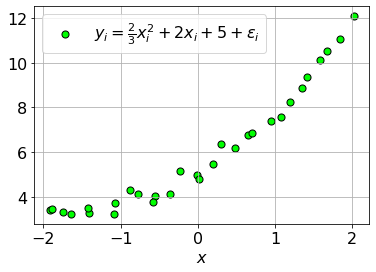

In [2]:
def f(vX):
    return 2/3*vX**2 + 2*vX + 5

N  = 30
vX = np.linspace(-2, 2, N, endpoint=True) + np.random.randn(N) / 20   
vY = f(vX) + np.random.randn(N) / 3

#-- Plot:
plt.figure ()
plt.scatter(vX, vY, s=50, c='lime', edgecolor='k', label=r'$y_i = \frac{2}{3}x_i^2 + 2x_i + 5 + \epsilon_i$')
plt.xlabel ('$x$')
plt.legend ()
plt.grid   ()
lAxis = plt.axis()

### (Polynomial) Lasso objective:
$$\arg\min_{\boldsymbol{w},b}\left\Vert \boldsymbol{y}-\boldsymbol{\Phi}\boldsymbol{w}-b\right\Vert _{2}^{2}+\lambda\left\Vert \boldsymbol{w}\right\Vert _{1}$$
where:
$$\boldsymbol{\Phi}=\left[\begin{matrix}x_{1} & x_{1}^{2} & \cdots & x_{1}^{P}\\
x_{2} & x_{2}^{2} & \cdots & x_{2}^{P}\\
\vdots & \vdots &  & \vdots\\
x_{N} & x_{N}^{2} & \cdots & x_{N}^{P}
\end{matrix}\right]$$

### Fit (and plot) Lasso:
(for each value of $\lambda$) 

In [5]:
from sklearn.linear_model  import Lasso
from sklearn.metrics       import r2_score
from sklearn.preprocessing import PolynomialFeatures

def PlotRegression(λ):
    P = 15 #-- polynomial order

    if λ == 0:
        #-- No Lasso (polyfit):
        vW  = np.polyfit(vX, vY, P)
    else:
        #-- Fit Lasso:
        mX   = PolynomialFeatures(degree=P, include_bias=False).fit_transform(vX[:,None])
        oMdl = Lasso(alpha=λ, fit_intercept=True, max_iter=30000).fit(mX, vY)
        #-- Get Lasso coefficients:
        vW   = np.r_[oMdl.coef_[::-1], oMdl.intercept_]

    #-- R2 score:
    vHatY = np.polyval(vW, vX)
    R2    = r2_score(vY, vHatY)
        
    #-- Plot:
    xx = np.linspace(lAxis[0], lAxis[1], 1001)
    yy = np.polyval(vW, xx)

    _, ax = plt.subplots(1, 2, figsize=(16, 8))
    ax[0].scatter  (vX, vY, s=50, c='lime', edgecolor='k', label=r'$y_i = \frac{2}{3}x_i^2 + 2x_i + 5 + \epsilon_i$')
    ax[0].plot     (xx, yy, c='b', lw=2)
    ax[0].set_title(f'$\lambda = {λ}$\n$R^2 = {R2}$')
    ax[0].axis     (lAxis)
    ax[0].grid     ()
    
    
    ax[1].stem      (np.arange(1, P+1), vW[-2::-1], use_line_collection=True)
    ax[1].set_title ('Coefficients ($w$)\n' f'$b = {vW[-1]}$')
    ax[1].set_xlabel('$w$')

#### Note that increasing the regularization factor $\lambda$ promotes a sparse coefficient vector

In [6]:
from ipywidgets import interact, FloatSlider, Layout

lamSlider = FloatSlider(min=0, max=2, step=0.001, value=0, layout=Layout(width='80%'))
interact(PlotRegression, λ=lamSlider)
plt.show()

interactive(children=(FloatSlider(value=0.0, description='λ', layout=Layout(width='80%'), max=2.0, step=0.001)…

### Exercise:
* Use the Boston house-prices dataset.
* Use cross-validation with $K=20$.
* Try to achieve the best R2 score you can.
* Hint 1:
    * Use `sklearn.preprocessing.PolynomialFeatures` to obtain polynomial features.
    * Use `sklearn.linear_model.LinearRegression` to compute a linear regressor model.
    * Use `cross_val_predict` instead of `cross_val_score` when performing regression.
* Hint 2: consider to normalize your features (and data),  
that is, zero mean and unit variance.

* Which value of $P$ provides the best result?  
Did you use regularization?

### Load the Boston house-prices dataset:

In [7]:
import sklearn.datasets

dData = sklearn.datasets.load_boston()
print(dData.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
mX = dData.data
vY = dData.target

mX.shape, vY.shape

((506, 13), (506,))

### Your solution:

In [7]:
import pandas as pd

from sklearn.preprocessing   import PolynomialFeatures
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.linear_model    import LinearRegression

???

Object `?` not found.
